This project is retrieved from Analytics Vidhya, along with the dataset. References are taken from its introductory course content. <br>
https://trainings.analyticsvidhya.com/courses/ <br>
The dataset can be downloaded here:  https://datahack.analyticsvidhya.com/contest/practice-problem-loan-prediction-iii/

# Problem Statement
*Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan. Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers.* <br>

This is a classification problem where we have to predict whether a loan would be approved or not. 

# Hypothesis
- Salary: Applicants with high income should have more chances of loan approval
- Previous history: Applicants who have repayed their previous debts should have higher chances of loan approval
- Loan amount: Loan approval should also depend on the loan amount. If the loan amount is high, chances of loan approval might be low
- Loan term: Loan for less time period and less amount should have higher chances of approval
- EMI: Lesser the amount to be paid monthly to repay the loan, higher the chanes of loan approval. 

In [193]:
#load tools
import pandas as pd
import numpy as np                     # For mathematical calculations
import seaborn as sns                  # For data visualization
import matplotlib.pyplot as plt        # For plotting graphs
%matplotlib inline
import warnings                        # To ignore any warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score,roc_curve
from xgboost import XGBClassifier
from pandas_ml import ConfusionMatrix

In [8]:
import sys
print (sys.version)
print (pd.__version__)
print(sns.__version__)

import sklearn
print (sklearn.__version__)

3.7.1 (default, Oct 28 2018, 08:39:03) [MSC v.1912 64 bit (AMD64)]
0.23.4
0.9.0
0.20.0


# Load Data
There are three CSV files: train, test and sample submission
- Train: used for training the model
- Test: apply the model to predict the target variables for the test data
- Sample submission: contains the format in which we will use to submit the predictions

In [9]:
#read data
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

#make a copy of data
train_original=train.copy()
test_original=test.copy()

# Data Overview

In [10]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [12]:
train.shape, test.shape

((614, 13), (367, 12))

In [13]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [14]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [18]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [19]:
train.describe(include=['O'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001768,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


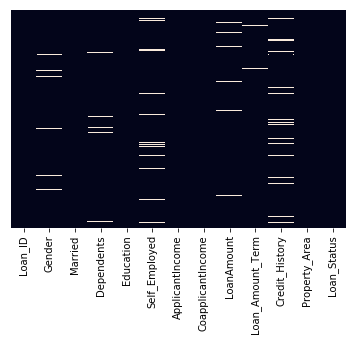

In [23]:
#check missing data
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

# Univariate Analysis
Univariate analysis is the simplest form of analyzing data where we examine each variable individually. 
- For categorical features we use frequency table or bar plots which will calculate the number of each category in a particular variable.
- For numerical features, probability density plots can be used to look at the distribution of the variable

## Target Variable

In [25]:
#check target variable : Loan_Status
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

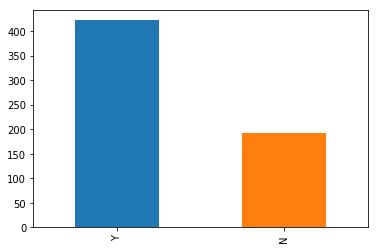

In [26]:
train['Loan_Status'].value_counts().plot.bar()

There are three types of variables:
- Categorical features: These features have categories (Gender, Married, Self_Employed, Credit_History, Loan_Status)
- Ordinal features: Variables in categorical features having some order invovled (Dependents, Education, Property_Area)
- Numerical features: (Applicantincome, CoapplicantIncome, LoanAmount, Loan_Amount_Term)

## Independent Variable (Categorical)

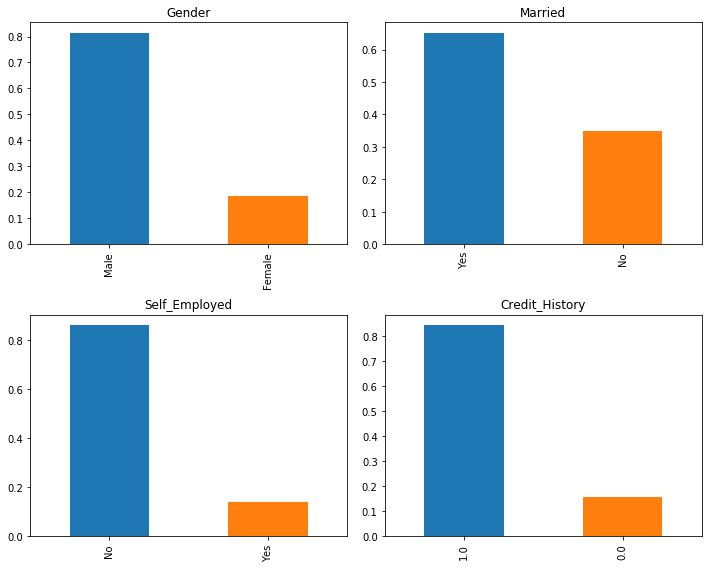

In [29]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,8))
ax=[ax1,ax2,ax3,ax4]
li = ['Gender','Married','Self_Employed','Credit_History']
for i,item in enumerate(ax):
    train[li[i]].value_counts(normalize=True).plot.bar(ax=item,title=li[i])
plt.tight_layout()

It can be inferred from the above bar plots:
- 80% applicants in the dataset are male
- About 65% of the applicants in train dataset are married
- About 15% applicants in train dataset are self-employed
- Most of the applicants (85%) have repaid their debts 

## Independent Variable(Ordinal)

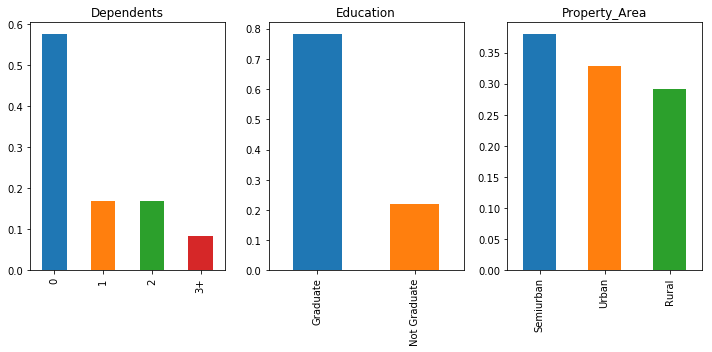

In [32]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(10,5))
ax=[ax1,ax2,ax3]
li = ['Dependents','Education','Property_Area']
for i,item in enumerate(ax):
    train[li[i]].value_counts(normalize=True).plot.bar(ax=item,title=li[i])
plt.tight_layout()

- Most of the applicants don't have any dependents
- About 80% of the applicants have Graduate degree
- There are relatively higher proportion (~35%) of applicants are from semi-urban area

## Independent Variable (Numerical)

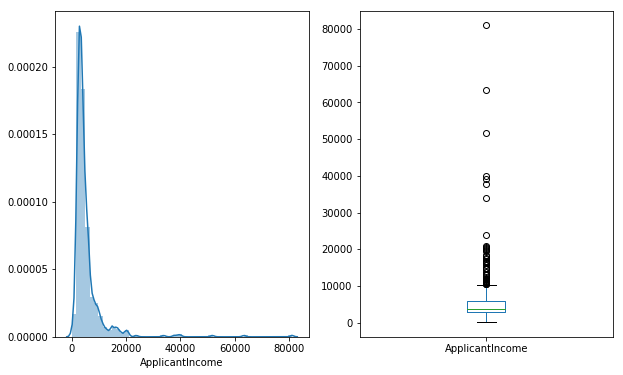

In [34]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(10,6))
sns.distplot(train['ApplicantIncome'],ax=ax1)
train['ApplicantIncome'].plot.box(ax=ax2)

It is observed that the distribution of applicant income is skewed to the left which means it is not normally distributed. <br>
From the boxplot, we can see there are quite a number of outliers/extreme values. 

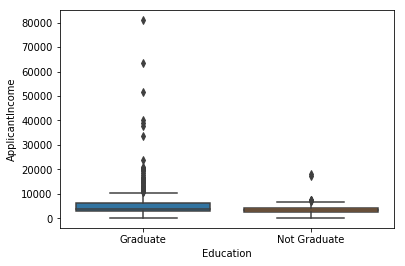

In [36]:
sns.boxplot(data=train, x='Education',y='ApplicantIncome')

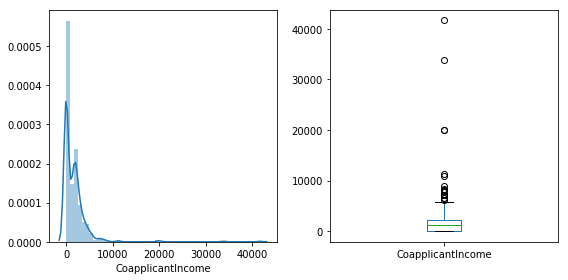

In [42]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(train['CoapplicantIncome'])

plt.subplot(122)
train['CoapplicantIncome'].plot.box()
plt.tight_layout()

In [49]:
train['LoanAmount'].isnull().sum()/len(train['LoanAmount'])

0.035830618892508145

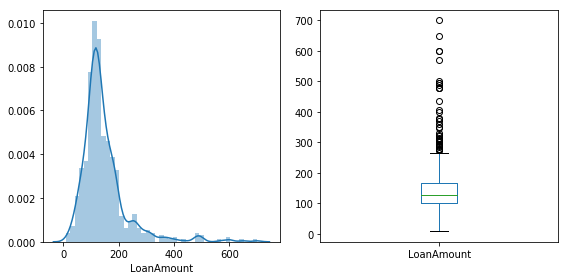

In [44]:
plt.figure(figsize=(8,4))
plt.subplot(121)
sns.distplot(train['LoanAmount'].dropna())

plt.subplot(122)
train['LoanAmount'].plot.box()
plt.tight_layout()

# Bivariate Analysis 
## Categorical Independent Variable vs Target Variable

In [68]:
#define a function for plotting
def stack_plot(f1,f2='Loan_Status'):
    """ Plot stack bar plot for bivariant analysis
        f1,f2:f1 is categorical feature
              f2 is the target variable (by default)"""
    df = pd.crosstab(train[f1],train[f2])
    df2 =df.div(df.sum(1).astype(float),axis=0)
    fig = df2.plot(kind='bar',stacked=True)
    plt.legend(loc=0)
    s=f1+' vs '+f2
    plt.title(s)
    plt.ylabel('% Loan Status')

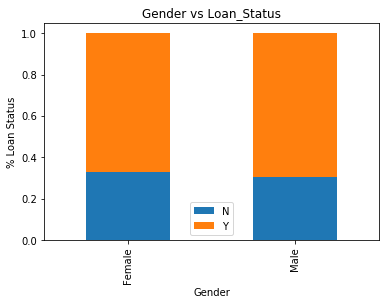

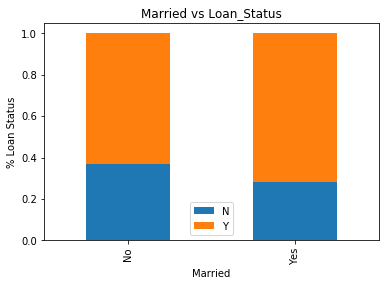

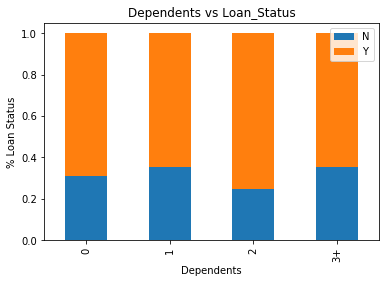

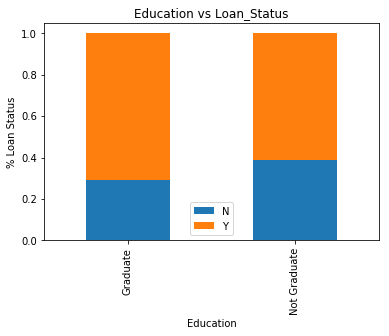

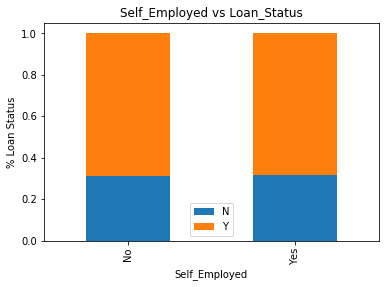

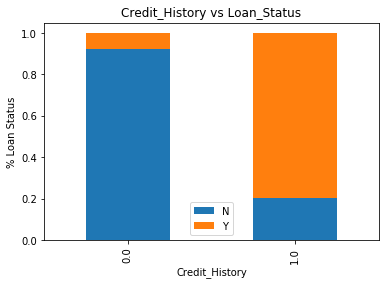

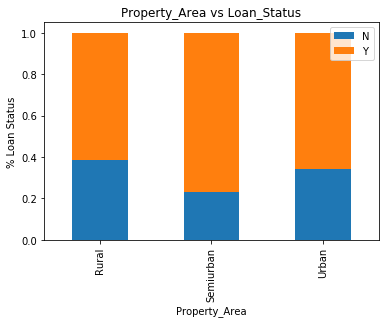

In [69]:
cat_list=['Gender','Married','Dependents','Education',
          'Self_Employed','Credit_History','Property_Area']
for f in cat_list:
    stack_plot(f)

## Numerical Independent Variables vs Target Variable

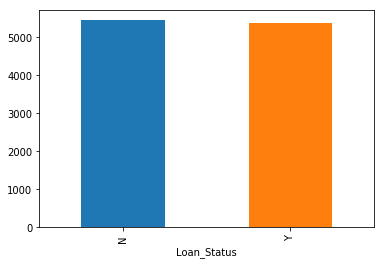

In [70]:
train.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

Since there is relatviely no difference in the mean applicant income, bins can be made for the applicant income variable based ont he values in it and analyze correpsonding loan status for each bin.

In [71]:
train['ApplicantIncome'].describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [72]:
# import math

# def create_bins(lower_bound, higher_bound, num_bins):
#     bins=[lower_bound]
#     space=math.floor((higher_bound-lower_bound)/num_bins)
#     for i in range(num_bins-1):
#         bins.append(lower_bound+space*(i+1))
#     bins.append(higher_bound)
#     return bins

# bins=create_bins(0,81000,5)

In [78]:
#equal sized bins are not good in this case
# bins

[0, 16200, 32400, 48600, 64800, 81000]

In [80]:
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high']
train['Income_bin']=pd.cut(train['ApplicantIncome'],bins,labels=group)

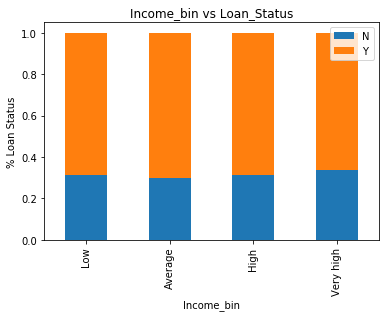

In [81]:
stack_plot('Income_bin')

Here, we can see that Applicant income does not affect the chances of loan approval which contradicts our hypothesis in which we assumed that if the applicant income is high the chances of loan approval will also be high. 

In [82]:
train['CoapplicantIncome'].describe()

count      614.000000
mean      1621.245798
std       2926.248369
min          0.000000
25%          0.000000
50%       1188.500000
75%       2297.250000
max      41667.000000
Name: CoapplicantIncome, dtype: float64

In [83]:
bins =[0,1000,3000,42000]
group=['Low','Average','High']
train['Coapplicant_Income_bin']=pd.cut(train['CoapplicantIncome'],bins,labels=group)

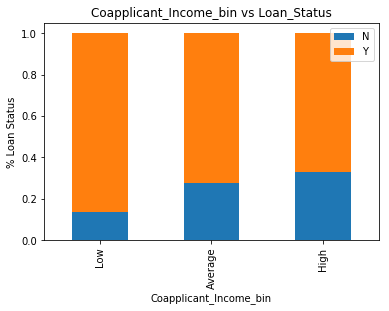

In [84]:
stack_plot('Coapplicant_Income_bin')

Now, it is clear that the chances of loan approval are higher if the coapplicant's income is less. However, this may not make sense. Perhaps, the possible reason is that most of the applicants do not have any coapplicant so the coapplicant income for such applicants is 0.

In [89]:
coapp_zero_income=train['CoapplicantIncome'].value_counts().sort_index().head(1)
coapp_zero_income

0.0    273
Name: CoapplicantIncome, dtype: int64

In [90]:
coapp_zero_income[0]/len(train['CoapplicantIncome'])

0.44462540716612375

Indeed, about 44% of the applicants do not have coapplicant since the income is 0.<br>
Now try combining the applicant income with their coapplicant income to see the combined effect of Total Income on the loan status.

In [91]:
train['Total_Income']=train['ApplicantIncome'] + train['CoapplicantIncome']

In [92]:
train['Total_Income'].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_Income, dtype: float64

In [93]:
bins = [0,2500,4000,6000,81000]
group=['Low','Average','High','Very High']
train['Total_Income_bin']=pd.cut(train['Total_Income'],bins, labels=group)

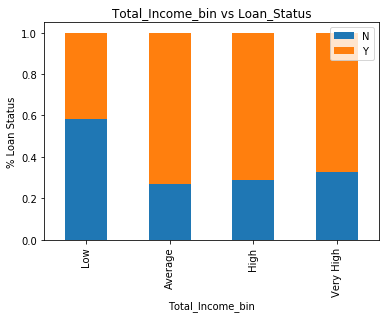

In [94]:
stack_plot('Total_Income_bin')

It is observed that the proportion of loans getting approved for applicants having low Total Income is much less compared to those with higher total income. 

In [95]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [96]:
bins=[0,100,200,700]
group=['Low','Average','High']
train['LoanAmount_bin']=pd.cut(train['LoanAmount'],bins,labels=group)

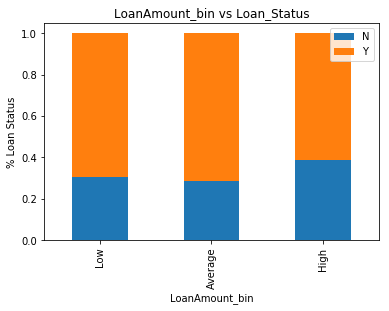

In [97]:
stack_plot('LoanAmount_bin')

In [99]:
col_drop=[x for x in train.columns if 'bin' in x]

In [100]:
col_drop

['Income_bin', 'Coapplicant_Income_bin', 'Total_Income_bin', 'LoanAmount_bin']

In [102]:
train.drop(col_drop,inplace=True,axis=1)

In [103]:
train['Dependents'].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [107]:
train['Dependents'].replace('3+',3,inplace=True)
test['Dependents'].replace('3+',3,inplace=True)
train['Loan_Status']=train['Loan_Status'].map({'N':0,'Y':1})

In [108]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0


Correlation between all the numerical variables.

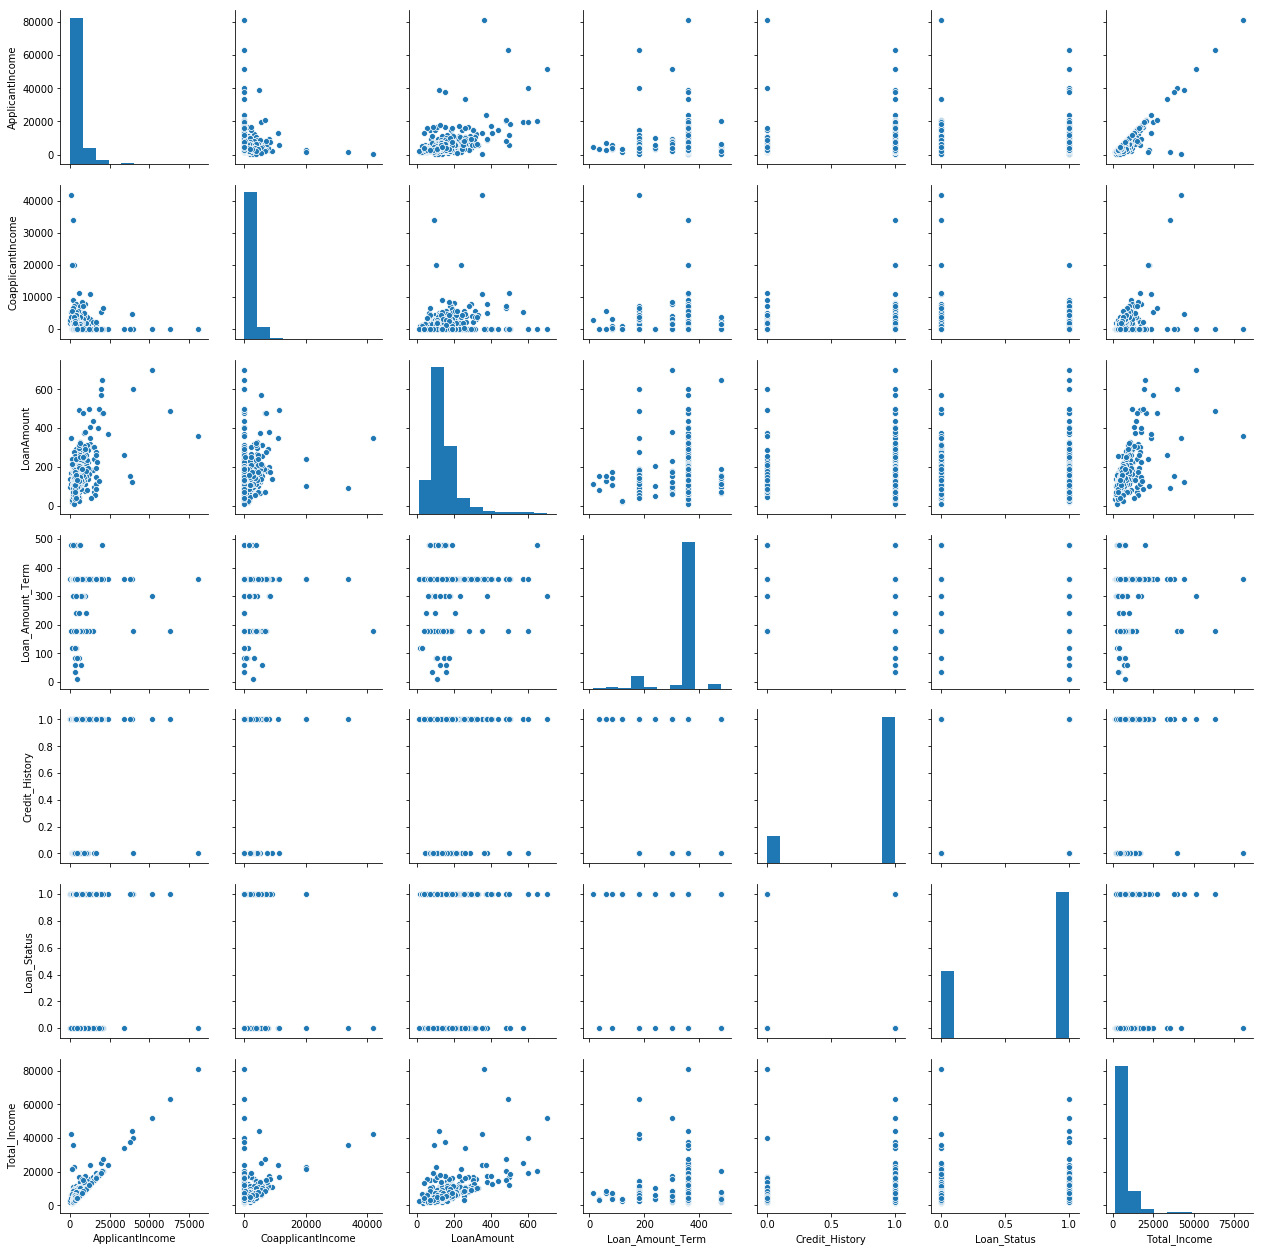

In [110]:
sns.pairplot(train.select_dtypes(include='number'))

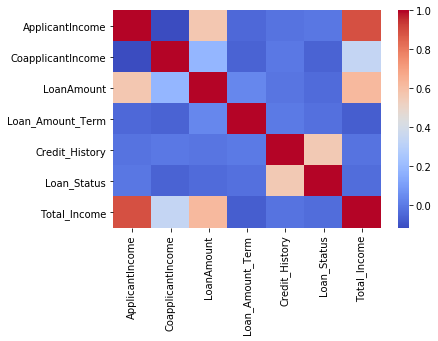

In [111]:
sns.heatmap(train.corr(),cmap='coolwarm',)

We see some coreelated variables:
- LoanAmount , ApplicantIncome
- Total_Income, ApplicantIncome
- Loan_Status, Credit_History

# Missing Value and Outlier Treatment
After exploring the variables in the data, we can impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance. <br>

For imputation, we consider:
- For numerical variables: imputation using mean or median
- For categorical variables:imputation using mode


In [120]:
temp=train.isnull().sum()
temp[temp!=0].sort_values(ascending=False)

Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
dtype: int64

In [124]:
missing_values=list(temp[temp!=0].index)
missing_values

['Gender',
 'Married',
 'Dependents',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [125]:
train.head(1)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0


In [126]:
cat_features=['Gender','Married','Dependents',
 'Self_Employed','Credit_History']
for f in cat_features:
    train[f].fillna(train[f].mode()[0],inplace=True)

In [127]:
train.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
Total_Income          0
dtype: int64

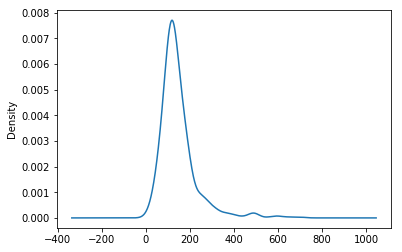

In [133]:
train['LoanAmount'].plot(kind='kde')

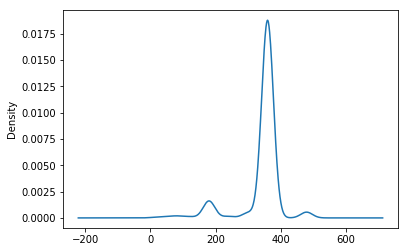

In [135]:
train['Loan_Amount_Term'].plot.kde()

In [136]:
train['LoanAmount'].fillna(train['LoanAmount'].median(),inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0],inplace=True)

In [137]:
#check there is no missing values
train.isnull().sum().sum()

0

In [138]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [139]:
test_cat_features=['Gender','Loan_Amount_Term','Dependents',
 'Self_Employed','Credit_History']
for f in test_cat_features:
    test[f].fillna(test[f].mode()[0],inplace=True)

## Outlier Treatment

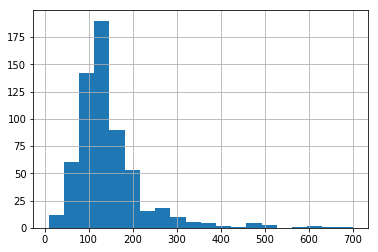

In [140]:
train['LoanAmount'].hist(bins=20)

In [141]:
train['LoanAmount_log']=np.log(train['LoanAmount'])
test['LoanAmount_log']=np.log(test['LoanAmount'])

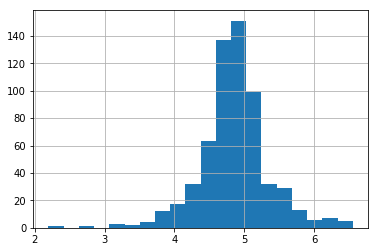

In [142]:
train['LoanAmount_log'].hist(bins=20)

# Model Building:Part 1

In [143]:
train.drop('Loan_ID',axis=1,inplace=True)
test.drop('Loan_ID',axis=1,inplace=True)

In [144]:
X=train.drop('Loan_Status',axis=1)
y=train.Loan_Status

In [145]:
X=pd.get_dummies(X,drop_first=True)
train=pd.get_dummies(train,drop_first=True)
test=pd.get_dummies(test,drop_first=True)

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [150]:
logReg=LogisticRegression()
logReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [151]:
y_pred = logReg.predict(X_test)

In [152]:
accuracy_score(y_test,y_pred)

0.7980295566502463

In [153]:
ConfusionMatrix(y_test,y_pred)

Predicted  False  True  __all__
Actual                         
False          3    25       28
True           6    40       46
__all__        9    65       74

## Logistic Regression using stratified k-folds cross validation

In [157]:
i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)

for train_index, test_index in kf.split(X,y):
    print('\n{} of kfold {}'.format(i, kf.n_splits))
    xtr, xvl = X.loc[train_index], X.loc[test_index]
    ytr,yvl = y[train_index],y[test_index]
    
    model=LogisticRegression()
    model.fit(xtr, ytr)
    y_pred = model.predict(xvl)
    score=accuracy_score(yvl,y_pred)
    print ('accuracy score',score)
    i+=1

pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy score 0.7983870967741935

2 of kfold 5
accuracy score 0.8306451612903226

3 of kfold 5
accuracy score 0.8114754098360656

4 of kfold 5
accuracy score 0.7950819672131147

5 of kfold 5
accuracy score 0.8278688524590164


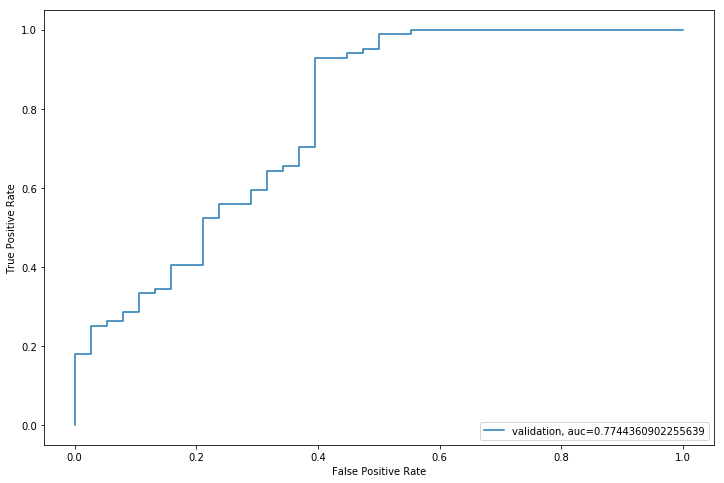

In [160]:
fpr, tpr,_=roc_curve(yvl,pred)
auc = roc_auc_score(yvl,pred)
plt.figure(figsize=(12,8))
plt.plot(fpr,tpr,label="validation, auc="+str(auc))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

# Feature Engineering
- Total Income
- EMI: EMI is the monthly amount to be paid by the applicant to repay the loan. People who have high EMI might have difficult to pay back the loan. EMI is calculated using the loan amount divided by loan amount term
- Balance Income: This is the income left after EMI has been paid. If the income balance is high, there will be higher chance the person can pay the loan.

In [161]:
train.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Total_Income,LoanAmount_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,1,5849.0,4.852030,1,0,1,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,0,6091.0,4.852030,1,1,0,1,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,1,3000.0,4.189655,1,1,1,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,1,4941.0,4.787492,1,1,1,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,1,6000.0,4.948760,1,0,1,0,0,0,0,0,1


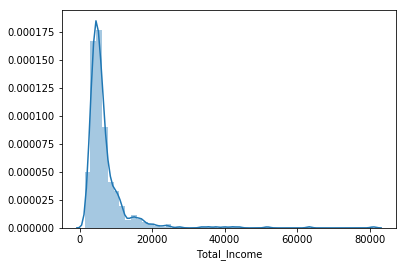

In [162]:
sns.distplot(train['Total_Income'])

In [163]:
train['Total_Income_log']=np.log(train['Total_Income'])

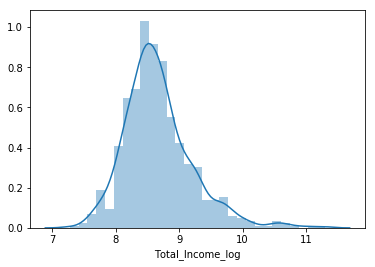

In [164]:
sns.distplot(train.Total_Income_log)

In [165]:
train['EMI'] = train['LoanAmount']/train['Loan_Amount_Term']

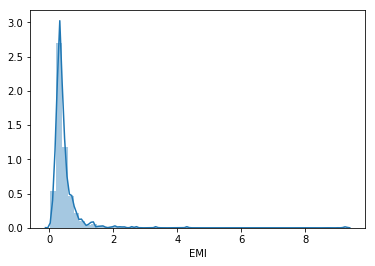

In [166]:
sns.distplot(train['EMI'])

In [167]:
train['Balance_Income']=train['Total_Income'] - train['EMI']*1000

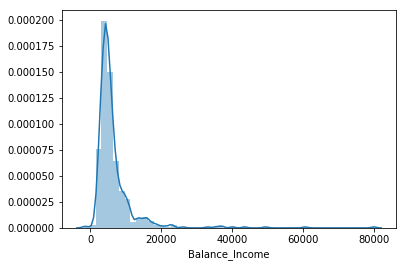

In [168]:
sns.distplot(train['Balance_Income'])

In [169]:
train=train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [170]:
train.head(1)

,Credit_History,Loan_Status,Total_Income,LoanAmount_log,Gender_Male,Married_Yes,Dependents_0,Dependents_1,Dependents_2,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Total_Income_log,EMI,Balance_Income
0,1.0,1,5849.0,4.85203,1,0,1,0,0,0,0,0,1,8.674026,0.355556,5493.444444


# Model Building : Part II

In [171]:
X=train.drop('Loan_Status',axis=1)
y=train.Loan_Status

## Logistic Regression

In [172]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = LogisticRegression(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
# pred_test = model.predict(test)
pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7786885245901639

5 of kfold 5
accuracy_score 0.819672131147541


## Decision Tree

In [174]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = DecisionTreeClassifier(random_state=1)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.6935483870967742

2 of kfold 5
accuracy_score 0.7096774193548387

3 of kfold 5
accuracy_score 0.7131147540983607

4 of kfold 5
accuracy_score 0.680327868852459

5 of kfold 5
accuracy_score 0.7213114754098361


## Random Forest

In [176]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=10)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1
# pred_test = model.predict(test)


1 of kfold 5
accuracy_score 0.7983870967741935

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.7704918032786885

4 of kfold 5
accuracy_score 0.7704918032786885

5 of kfold 5
accuracy_score 0.819672131147541


In [178]:
paramgrid = {'max_depth': list(range(1, 20, 2)), 'n_estimators': list(range(1, 200, 20))}
grid_search=GridSearchCV(RandomForestClassifier(random_state=1),paramgrid)

In [179]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [180]:
#fit grid search model
grid_search.fit(X_train,y_train)

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 13, 15, 17, 19], 'n_estimators': [1, 21, 41, 61, 81, 101, 121, 141, 161, 181]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [181]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [186]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=41, n_jobs=None,
            oob_score=False, random_state=1, verbose=0, warm_start=False)

In [189]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = RandomForestClassifier(random_state=1, max_depth=3, n_estimators=41)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1



1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8306451612903226

3 of kfold 5
accuracy_score 0.8032786885245902

4 of kfold 5
accuracy_score 0.7868852459016393

5 of kfold 5
accuracy_score 0.8278688524590164


In [192]:
pd.Series(model.feature_importances_,X.columns).sort_values(ascending=False)

Credit_History             0.532098
Total_Income               0.154496
Total_Income_log           0.101009
Property_Area_Semiurban    0.048019
Balance_Income             0.033892
LoanAmount_log             0.032219
EMI                        0.031564
Married_Yes                0.016491
Dependents_2               0.014627
Education_Not Graduate     0.009076
Property_Area_Urban        0.008176
Dependents_1               0.007401
Dependents_0               0.005719
Self_Employed_Yes          0.005004
Gender_Male                0.000209
dtype: float64

In [194]:
i=1
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True)
for train_index,test_index in kf.split(X,y):
     print('\n{} of kfold {}'.format(i,kf.n_splits))
     xtr,xvl = X.loc[train_index],X.loc[test_index]
     ytr,yvl = y[train_index],y[test_index]
    
     model = XGBClassifier(n_estimators=50, max_depth=4)
     model.fit(xtr, ytr)
     pred_test = model.predict(xvl)
     score = accuracy_score(yvl,pred_test)
     print('accuracy_score',score)
     i+=1


1 of kfold 5
accuracy_score 0.7903225806451613

2 of kfold 5
accuracy_score 0.8145161290322581

3 of kfold 5
accuracy_score 0.7704918032786885

4 of kfold 5
accuracy_score 0.7622950819672131

5 of kfold 5
accuracy_score 0.7950819672131147
